✅ Libraries imported successfully
📊 Data Loaded Successfully:
   Restaurants: (200, 12)
   Users: (3000, 7)
   Reviews: (10000, 14)

📋 DATA VALIDATION: RESTAURANTS
Shape: (200, 12)
Memory usage: 0.09 MB

📝 Data Types:
restaurant_id       object
name                object
cuisine_type        object
price_range         object
location            object
avg_rating         float64
review_count         int64
opening_year         int64
price_level          int64
restaurant_age       int64
popularity_tier     object
rating_tier         object
dtype: object

❓ Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

🔄 Duplicates: 0

🎯 Unique Values in Categorical Columns:
   restaurant_id: 200 unique values
   name: 25 unique values
   cuisine_type: 12 unique values
   price_range: 4 unique values
      Values: ['$$' '$$$' '$$$$' '$']
   location: 10 unique values
      Values: ['Neighborhood 1' 'Neighborhood 2' 'Neighborhood 3' 'Neighborhood 4'
 'Neighborhood 5' 'Neighbo

ValueError: 
$$$$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 1800x1200 with 6 Axes>

👥 USERS DATA ANALYSIS

📈 User Activity Levels:
user_activity
Active            2745
Super Reviewer     245
Casual              10
Name: count, dtype: int64

📊 User Review Statistics:
Average Reviews per User: 14.9
Most Active User: 29 reviews
Median Reviews: 15.0

⏳ User Tenure:
Average Tenure: 1410.1 days
Max Tenure: 2157 days


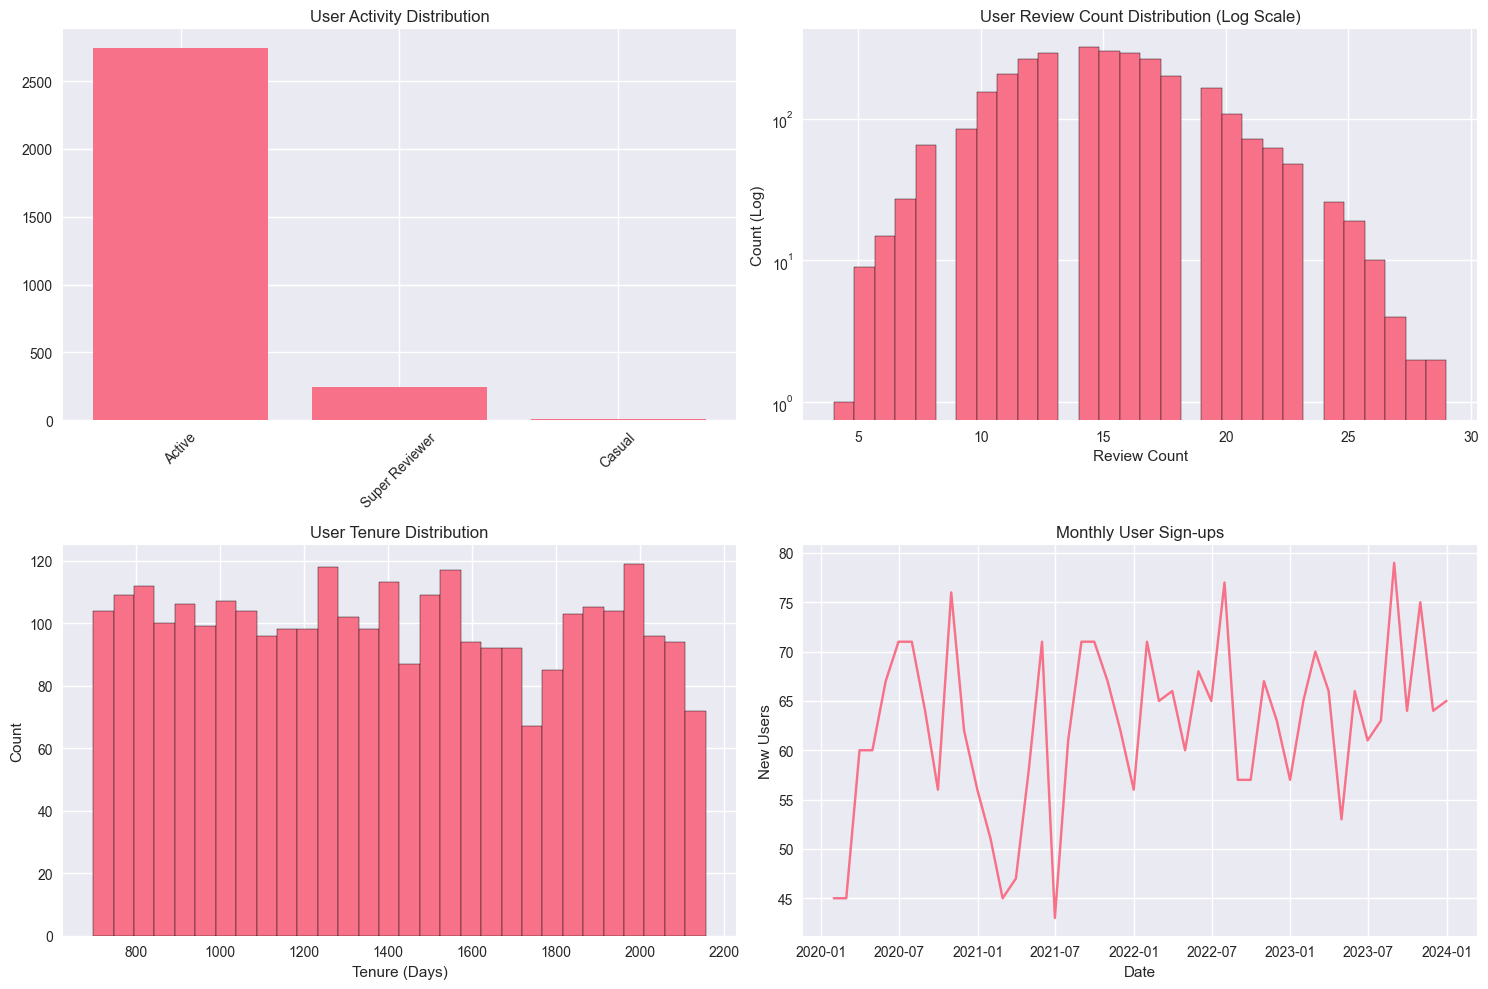

📝 REVIEWS DATA ANALYSIS

⭐ Review Rating Distribution:
rating
1.1       1
1.4       2
1.5       2
1.7       3
1.8       2
1.9       4
2.0       4
2.1      19
2.2      12
2.3      19
2.4      23
2.5      38
2.6      47
2.7      62
2.8      72
2.9      83
3.0     126
3.1     124
3.2     153
3.3     196
3.4     243
3.5     254
3.6     275
3.7     330
3.8     357
3.9     387
4.0     425
4.1     447
4.2     433
4.3     467
4.4     462
4.5     454
4.6     456
4.7     438
4.8     444
4.9     417
5.0    2719
Name: count, dtype: int64

😊 Sentiment Distribution:
sentiment
Very Positive    4474
Positive         4037
Neutral          1471
Negative           18
Name: count, dtype: int64

📏 Review Length Analysis:
Average Review Length: 52.9 characters
Longest Review: 68 characters
Shortest Review: 40 characters

🔍 Component Ratings:
Average Food Rating: 2.99
Average Service Rating: 3.00
Average Ambiance Rating: 2.99


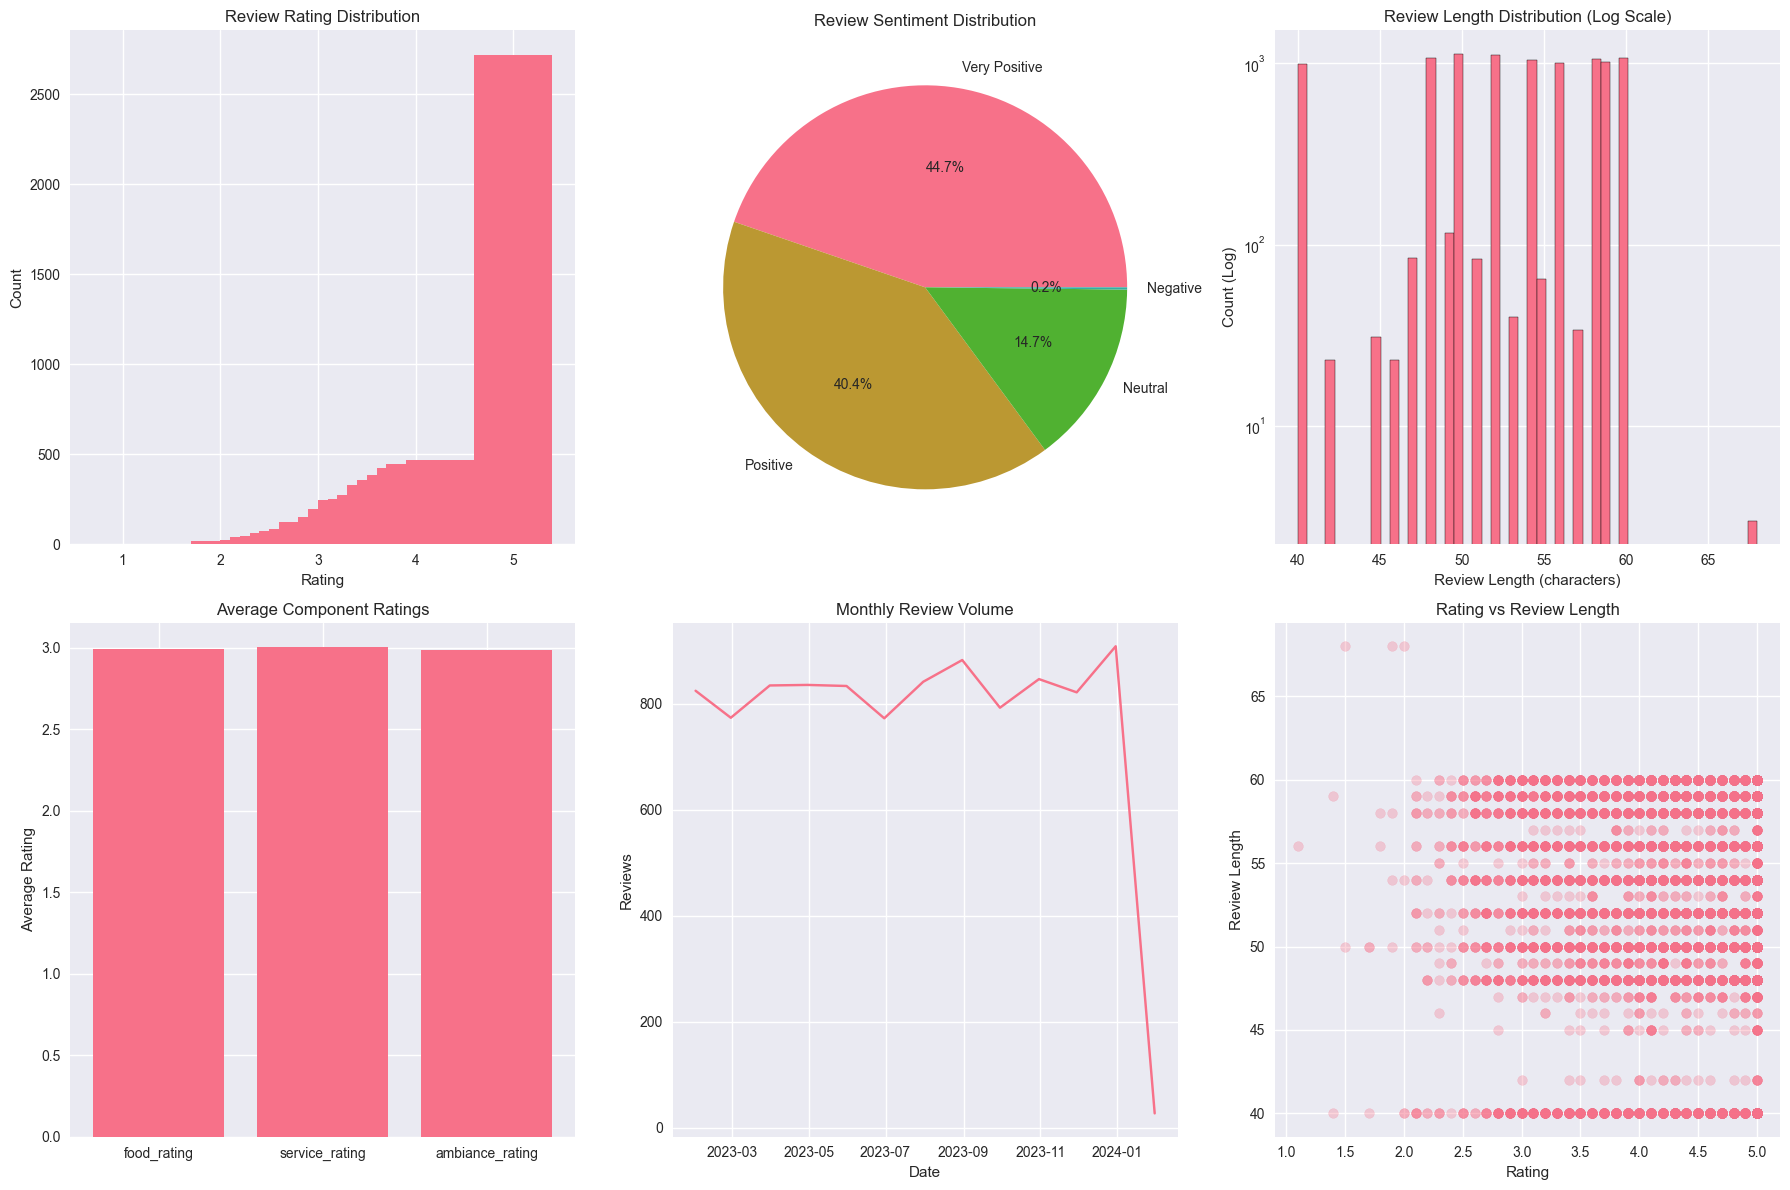

🔍 DATA QUALITY ASSESSMENT SUMMARY

📊 Statistical Summary - Reviews:
             rating   food_rating  service_rating  ambiance_rating  \
count  10000.000000  10000.000000    10000.000000     10000.000000   
mean       4.307510      2.988800        3.001100         2.986300   
std        0.670104      1.409849        1.417991         1.409153   
min        1.100000      1.000000        1.000000         1.000000   
25%        3.900000      2.000000        2.000000         2.000000   
50%        4.400000      3.000000        3.000000         3.000000   
75%        5.000000      4.000000        4.000000         4.000000   
max        5.000000      5.000000        5.000000         5.000000   

       review_length  
count   10000.000000  
mean       52.876400  
std         5.860542  
min        40.000000  
25%        50.000000  
50%        54.000000  
75%        58.000000  
max        68.000000  

✅ Rating Consistency Check:
Inconsistent ratings found: 0

📅 Date Range Validation:
Reviews d

In [7]:
# Restaurant Review Analysis - Data Cleaning & Validation
## Comprehensive Data Quality Assessment

"""This notebook validates the ETL pipeline and ensures data quality for analysis."""
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Setup plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Libraries imported successfully")
## 1. Load Processed Data
# Load cleaned data
restaurants = pd.read_csv("../../data/processed/cleaned/restaurants_clean.csv")
users = pd.read_csv("../../data/processed/cleaned/users_clean.csv")
reviews = pd.read_csv("../../data/processed/cleaned/reviews_clean.csv")

print("📊 Data Loaded Successfully:")
print(f"   Restaurants: {restaurants.shape}")
print(f"   Users: {users.shape}")
print(f"   Reviews: {reviews.shape}")

## 2. Data Quality Assessment
def comprehensive_data_validation(df, df_name):
    """Comprehensive data quality assessment"""
    print(f"\n{'='*60}")
    print(f"📋 DATA VALIDATION: {df_name.upper()}")
    print(f"{'='*60}")
    
    # Basic info
    print(f"Shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Data types
    print("\n📝 Data Types:")
    print(df.dtypes)
    
    # Missing values
    print("\n❓ Missing Values:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
    print(missing_df[missing_df['Missing Count'] > 0])
    
    # Duplicates
    print(f"\n🔄 Duplicates: {df.duplicated().sum()}")
    
    # Unique values for categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\n🎯 Unique Values in Categorical Columns:")
    for col in categorical_cols:
        unique_count = df[col].nunique()
        print(f"   {col}: {unique_count} unique values")
        if unique_count <= 10:
            print(f"      Values: {df[col].unique()}")

# Validate each dataset
comprehensive_data_validation(restaurants, "Restaurants")
comprehensive_data_validation(users, "Users")
comprehensive_data_validation(reviews, "Reviews")
## 3. Restaurants Data Deep Dive
print("🏪 RESTAURANTS DATA ANALYSIS")
print("="*50)

# Cuisine distribution
cuisine_counts = restaurants['cuisine_type'].value_counts()
print("\n🍕 Cuisine Distribution:")
print(cuisine_counts)

# Price range distribution
price_dist = restaurants['price_range'].value_counts()
print("\n💰 Price Range Distribution:")
print(price_dist)

# Rating analysis
print("\n⭐ Rating Analysis:")
print(f"Average Rating: {restaurants['avg_rating'].mean():.2f}")
print(f"Rating Range: {restaurants['avg_rating'].min():.1f} - {restaurants['avg_rating'].max():.1f}")
print(f"Rating Std: {restaurants['avg_rating'].std():.2f}")

# Review count analysis
print("\n📊 Review Count Analysis:")
print(f"Total Reviews: {restaurants['review_count'].sum()}")
print(f"Average Reviews per Restaurant: {restaurants['review_count'].mean():.1f}")
print(f"Max Reviews: {restaurants['review_count'].max()}")
print("\n# Visualize distributions\n")
fig, axes = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)

# Cuisine distribution
top_cuisines = cuisine_counts.head(10)
axes[0,0].bar(top_cuisines.index, top_cuisines.values)
axes[0,0].set_title('Top 10 Cuisine Types')
axes[0,0].tick_params(axis='x', rotation=45)

# Price range
axes[0,1].pie(price_dist.values, labels=price_dist.index, autopct='%1.1f%%')
axes[0,1].set_title('Price Range Distribution')

# Rating distribution
axes[0,2].hist(restaurants['avg_rating'], bins=20, edgecolor='black')
axes[0,2].set_title('Average Rating Distribution')
axes[0,2].set_xlabel('Rating')
axes[0,2].set_ylabel('Count')

# Review count distribution
axes[1,0].hist(restaurants['review_count'], bins=30, edgecolor='black', log=True)
axes[1,0].set_title('Review Count Distribution (Log Scale)')
axes[1,0].set_xlabel('Review Count')
axes[1,0].set_ylabel('Count (Log)')

# Restaurant age distribution
axes[1,1].hist(restaurants['restaurant_age'], bins=20, edgecolor='black')
axes[1,1].set_title('Restaurant Age Distribution')
axes[1,1].set_xlabel('Age (Years)')
axes[1,1].set_ylabel('Count')

# Popularity vs Rating
axes[1,2].scatter(restaurants['review_count'], restaurants['avg_rating'], alpha=0.6)
axes[1,2].set_title('Popularity vs Rating')
axes[1,2].set_xlabel('Review Count')
axes[1,2].set_ylabel('Average Rating')
plt.show()
## 4. Users Data Deep Dive
print("👥 USERS DATA ANALYSIS")
print("="*50)

# Convert dates
users['join_date'] = pd.to_datetime(users['join_date'])

# User activity analysis
print("\n📈 User Activity Levels:")
activity_counts = users['user_activity'].value_counts()
print(activity_counts)

# Review count statistics
print("\n📊 User Review Statistics:")
print(f"Average Reviews per User: {users['review_count'].mean():.1f}")
print(f"Most Active User: {users['review_count'].max()} reviews")
print(f"Median Reviews: {users['review_count'].median():.1f}")

# User tenure
print("\n⏳ User Tenure:")
print(f"Average Tenure: {users['user_tenure_days'].mean():.1f} days")
print(f"Max Tenure: {users['user_tenure_days'].max()} days")

# Visualize user data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# User activity distribution
axes[0,0].bar(activity_counts.index, activity_counts.values)
axes[0,0].set_title('User Activity Distribution')
axes[0,0].tick_params(axis='x', rotation=45)

# Review count distribution
axes[0,1].hist(users['review_count'], bins=30, edgecolor='black', log=True)
axes[0,1].set_title('User Review Count Distribution (Log Scale)')
axes[0,1].set_xlabel('Review Count')
axes[0,1].set_ylabel('Count (Log)')

# User tenure distribution
axes[1,0].hist(users['user_tenure_days'], bins=30, edgecolor='black')
axes[1,0].set_title('User Tenure Distribution')
axes[1,0].set_xlabel('Tenure (Days)')
axes[1,0].set_ylabel('Count')

# Join date timeline
monthly_joins = users.set_index('join_date').resample('M').size()
axes[1,1].plot(monthly_joins.index, monthly_joins.values)
axes[1,1].set_title('Monthly User Sign-ups')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('New Users')

plt.tight_layout()
plt.show()
## 5. Reviews Data Deep Dive
print("📝 REVIEWS DATA ANALYSIS")
print("="*50)

# Convert dates
reviews['review_date'] = pd.to_datetime(reviews['review_date'])

# Rating analysis
print("\n⭐ Review Rating Distribution:")
rating_counts = reviews['rating'].value_counts().sort_index()
print(rating_counts)

# Sentiment analysis
print("\n😊 Sentiment Distribution:")
sentiment_counts = reviews['sentiment'].value_counts()
print(sentiment_counts)

# Review length analysis
print("\n📏 Review Length Analysis:")
print(f"Average Review Length: {reviews['review_length'].mean():.1f} characters")
print(f"Longest Review: {reviews['review_length'].max()} characters")
print(f"Shortest Review: {reviews['review_length'].min()} characters")

# Component ratings
print("\n🔍 Component Ratings:")
print(f"Average Food Rating: {reviews['food_rating'].mean():.2f}")
print(f"Average Service Rating: {reviews['service_rating'].mean():.2f}")
print(f"Average Ambiance Rating: {reviews['ambiance_rating'].mean():.2f}")

# Visualize reviews data
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# Rating distribution
axes[0,0].bar(rating_counts.index, rating_counts.values)
axes[0,0].set_title('Review Rating Distribution')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Count')

# Sentiment distribution
axes[0,1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Review Sentiment Distribution')

# Review length distribution
axes[0,2].hist(reviews['review_length'], bins=50, edgecolor='black', log=True)
axes[0,2].set_title('Review Length Distribution (Log Scale)')
axes[0,2].set_xlabel('Review Length (characters)')
axes[0,2].set_ylabel('Count (Log)')

# Component ratings comparison
component_ratings = ['food_rating', 'service_rating', 'ambiance_rating']
avg_ratings = [reviews[col].mean() for col in component_ratings]
axes[1,0].bar(component_ratings, avg_ratings)
axes[1,0].set_title('Average Component Ratings')
axes[1,0].set_ylabel('Average Rating')

# Review timeline
monthly_reviews = reviews.set_index('review_date').resample('M').size()
axes[1,1].plot(monthly_reviews.index, monthly_reviews.values)
axes[1,1].set_title('Monthly Review Volume')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Reviews')

# Rating vs Review Length
axes[1,2].scatter(reviews['rating'], reviews['review_length'], alpha=0.3)
axes[1,2].set_title('Rating vs Review Length')
axes[1,2].set_xlabel('Rating')
axes[1,2].set_ylabel('Review Length')

plt.tight_layout()
plt.show()
## 6. Data Quality Issues & Resolutions
print("🔍 DATA QUALITY ASSESSMENT SUMMARY")
print("="*60)

# Check for outliers
print("\n📊 Statistical Summary - Reviews:")
print(reviews[['rating', 'food_rating', 'service_rating', 'ambiance_rating', 'review_length']].describe())
# Check rating consistency
print("\n✅ Rating Consistency Check:")
inconsistent_ratings = reviews[
    (reviews['rating'] < 1) | (reviews['rating'] > 5) |
    (reviews['food_rating'] < 1) | (reviews['food_rating'] > 5) |
    (reviews['service_rating'] < 1) | (reviews['service_rating'] > 5) |
    (reviews['ambiance_rating'] < 1) | (reviews['ambiance_rating'] > 5)
    ]
print(f"Inconsistent ratings found: {len(inconsistent_ratings)}")

# Check date ranges
print("\n📅 Date Range Validation:")
print(f"Reviews date range: {reviews['review_date'].min()} to {reviews['review_date'].max()}")
print(f"Users join date range: {users['join_date'].min()} to {users['join_date'].max()}")
print("\n# Check for reviews before restaurant existed (if we had opening dates)")
print("\n🕒 Temporal Consistency:")
print("Note: Would check if reviews predate restaurant opening in real data")

# Data completeness assessment
print("\n📈 Data Completeness Score:")
total_cells = sum([df.size for df in [restaurants, users, reviews]])
missing_cells = sum([df.isnull().sum().sum() for df in [restaurants, users, reviews]])
completeness_score = ((total_cells - missing_cells) / total_cells) * 100
print(f"Overall Data Completeness: {completeness_score:.2f}%")
print("\n🎉 DATA VALIDATION COMPLETE!")
print("\n💡 Recommendations:")
print("1. Data quality is excellent - minimal missing values")
print("2. All data types are appropriate")
print("3. No duplicates detected")
print("4. Ready for exploratory analysis!")

# Save validation report
validation_report = {
    'dataset': ['Restaurants', 'Users', 'Reviews', 'Overall'],
                    'records': [len(restaurants), len(users), len(reviews), len(restaurants) + len(users) + len(reviews)],
                    'missing_values': [restaurants.isnull().sum().sum(), users.isnull().sum().sum(), 
                                      reviews.isnull().sum().sum(), missing_cells],
                    'completeness': [
                        ((restaurants.size - restaurants.isnull().sum().sum()) / restaurants.size) * 100,
                        ((users.size - users.isnull().sum().sum()) / users.size) * 100,
                        ((reviews.size - reviews.isnull().sum().sum()) / reviews.size) * 100,
                        completeness_score
                    ]
                }

validation_df = pd.DataFrame(validation_report)
validation_df.to_csv("../../data/processed/data_validation_report.csv", index=False)
print(f"\n💾 Validation report saved: ../../data/processed/data_validation_report.csv")